In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [55]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import *

In [12]:
data = pd.read_csv('1.txt',sep='\t', names=['x','y'])
data

,x,y
0,-10.939341,-37.062742
1,-10.939341,-37.062742
2,-10.939324,-37.062765
3,-10.939211,-37.062843
4,-10.938939,-37.062879
...,...,...
85,-10.947085,-37.045783
86,-10.947085,-37.045783
87,-10.947085,-37.045783
88,-10.947085,-37.045783


In [6]:
kmeans = KMeans(n_clusters=3).fit(data.values)
kmeans.cluster_centers_

array([[-10.94245049, -37.05089009],
       [-10.94070669, -37.05890762],
       [-10.94614053, -37.04606112]])

In [74]:
def euclidean(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def _c(ca, i, j, p, q):

    if ca[i, j] > -1:
        return ca[i, j]
    elif i == 0 and j == 0:
        ca[i, j] = np.linalg.norm(p[i]-q[j])
    elif i > 0 and j == 0:
        ca[i, j] = max(_c(ca, i-1, 0, p, q), np.linalg.norm(p[i]-q[j]))
    elif i == 0 and j > 0:
        ca[i, j] = max(_c(ca, 0, j-1, p, q), np.linalg.norm(p[i]-q[j]))
    elif i > 0 and j > 0:
        ca[i, j] = max(
            min(
                _c(ca, i-1, j, p, q),
                _c(ca, i-1, j-1, p, q),
                _c(ca, i, j-1, p, q)
            ),
            np.linalg.norm(p[i]-q[j])
            )
    else:
        ca[i, j] = float('inf')

    return ca[i, j]


def frdist(p, q):
    p = np.array([p], np.float64)
    q = np.array([q], np.float64)

    len_p = len(p)
    len_q = len(q)

    if len_p == 0 or len_q == 0:
        raise ValueError('Input curves are empty.')

    if len_p != len_q or len(p[0]) != len(q[0]):
        raise ValueError('Input curves do not have the same dimensions.')

    ca = (np.ones((len_p, len_q), dtype=np.float64) * -1)

    dist = _c(ca, len_p-1, len_q-1, p, q)
    return dist

def manhattan(a,b):
    return abs(a[0]-b[0])+abs(a[1]-b[1])

In [75]:
class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=42, algo=euclidean):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.algo = algo

    def initialize_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            for i in range(X.shape[0]):
            # row_norm = norm(X - centroids[k, :], axis=1)
            # distance[:, k] = np.square(row_norm)
                distance[i, k] = self.algo(X[i], centroids[k, :])
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

In [81]:
def get_similarity_matrix(a, centroids, dist_metric):
	n = a.shape[0]
	k = len(centroids)
	sim = np.zeros((n,k))
	for i in range(n):
		for j in range(k):
			sim[i][j] = dist_metric(a[i] , centroids[j])
	# print(sim.shape)
	return sim

In [85]:
eucl = Kmeans(n_clusters=3, algo=euclidean)
eucl.fit(data.values)

print(eucl.centroids)
print()
print(get_similarity_matrix(data.values, eucl.centroids, euclidean))

[[-10.9407067  -37.05890762]
 [-10.94245049 -37.05089009]
 [-10.94614053 -37.04606112]]

[[0.0040703  0.01225304 0.01801343]
 [0.0040703  0.01225304 0.01801343]
 [0.00409727 0.01227913 0.01804076]
 [0.00421023 0.01238428 0.01815648]
 [0.00434667 0.0124922  0.01829454]
 [0.00448688 0.01257109 0.01841737]
 [0.00437202 0.01239666 0.0182723 ]
 [0.00382903 0.01180858 0.01769776]
 [0.00329834 0.01126363 0.01715207]
 [0.00257181 0.01051612 0.01640078]
 [0.00180282 0.00970746 0.01558604]
 [0.0012204  0.00905951 0.01493068]
 [0.00087527 0.00862987 0.01449276]
 [0.00065426 0.00819027 0.01404415]
 [0.00069371 0.00768251 0.01351466]
 [0.00091625 0.00730372 0.01309383]
 [0.00135314 0.00686829 0.01259671]
 [0.00170201 0.00657334 0.01225138]
 [0.00176672 0.00652063 0.01218924]
 [0.00176672 0.00652063 0.01218924]
 [0.00176672 0.00652063 0.01218924]
 [0.00176672 0.00652063 0.01218924]
 [0.00176672 0.00652063 0.01218924]
 [0.00176672 0.00652063 0.01218924]
 [0.00176672 0.00652063 0.01218924]
 [0.0017667

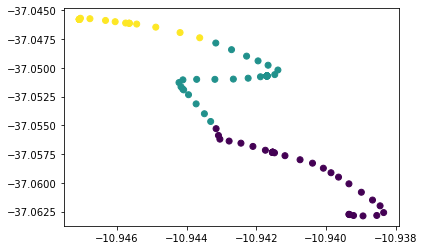

In [131]:
plt.figure()
plt.scatter(data.values[:,0],data.values[:,1],c=np.argmin(get_similarity_matrix(data.values, eucl.centroids, euclidean),axis=1))
plt.show()

In [86]:
manhat = Kmeans(n_clusters=3, algo=manhattan)
manhat.fit(data.values)
print(manhat.centroids)
print()
print(get_similarity_matrix(data.values, manhat.centroids, manhattan))

[[-10.93914759 -37.06151105]
 [-10.94371355 -37.04906369]
 [-10.941944   -37.05683452]]

[[0.00142486 0.01805058 0.00851019]
 [0.00142486 0.01805058 0.00851019]
 [0.00142982 0.01809042 0.00855003]
 [0.00139497 0.01828235 0.00874196]
 [0.00157616 0.01858948 0.00904909]
 [0.00193161 0.01894493 0.00940454]
 [0.00187804 0.01889136 0.00935097]
 [0.00118792 0.01820124 0.00866085]
 [0.00049364 0.01748272 0.00794233]
 [0.00085319 0.01648285 0.00694246]
 [0.00161967 0.01539365 0.00585326]
 [0.0025018  0.01451152 0.00497113]
 [0.00310005 0.01391327 0.00437288]
 [0.00371175 0.01330157 0.00376118]
 [0.00446168 0.01255164 0.00301125]
 [0.00511761 0.01189571 0.00235532]
 [0.00590312 0.0111102  0.00156981]
 [0.00645198 0.01056134 0.00102095]
 [0.00655019 0.01046313 0.00092274]
 [0.00655019 0.01046313 0.00092274]
 [0.00655019 0.01046313 0.00092274]
 [0.00655019 0.01046313 0.00092274]
 [0.00655019 0.01046313 0.00092274]
 [0.00655019 0.01046313 0.00092274]
 [0.00655019 0.01046313 0.00092274]
 [0.0065501

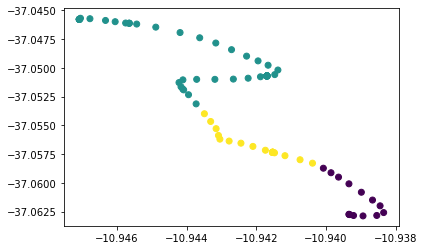

In [132]:
plt.figure()
plt.scatter(data.values[:,0],data.values[:,1],c=np.argmin(get_similarity_matrix(data.values, manhat.centroids, manhattan),axis=1))
plt.show()

In [87]:
frechet = Kmeans(n_clusters=3, algo=frdist)
frechet.fit(data.values)

print(frechet.centroids)
print()
print(get_similarity_matrix(data.values, frechet.centroids, frdist))

[[-10.94614053 -37.04606112]
 [-10.9407067  -37.05890762]
 [-10.94245049 -37.05089009]]

[[0.01801343 0.0040703  0.01225304]
 [0.01801343 0.0040703  0.01225304]
 [0.01804076 0.00409727 0.01227913]
 [0.01815648 0.00421023 0.01238428]
 [0.01829454 0.00434667 0.0124922 ]
 [0.01841737 0.00448688 0.01257109]
 [0.0182723  0.00437202 0.01239666]
 [0.01769776 0.00382903 0.01180858]
 [0.01715207 0.00329834 0.01126363]
 [0.01640078 0.00257181 0.01051612]
 [0.01558604 0.00180282 0.00970746]
 [0.01493068 0.0012204  0.00905951]
 [0.01449276 0.00087527 0.00862987]
 [0.01404415 0.00065426 0.00819027]
 [0.01351466 0.00069371 0.00768251]
 [0.01309383 0.00091625 0.00730372]
 [0.01259671 0.00135314 0.00686829]
 [0.01225138 0.00170201 0.00657334]
 [0.01218924 0.00176672 0.00652063]
 [0.01218924 0.00176672 0.00652063]
 [0.01218924 0.00176672 0.00652063]
 [0.01218924 0.00176672 0.00652063]
 [0.01218924 0.00176672 0.00652063]
 [0.01218924 0.00176672 0.00652063]
 [0.01218924 0.00176672 0.00652063]
 [0.0121892

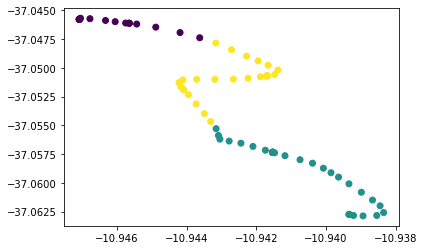

In [133]:
plt.figure()
plt.scatter(data.values[:,0],data.values[:,1],c=np.argmin(get_similarity_matrix(data.values, frechet.centroids, frdist),axis=1))
plt.show()

In [88]:
cheby = Kmeans(n_clusters=3, algo=chebyshev)
cheby.fit(data.values)

print(cheby.centroids)
print()
print(get_similarity_matrix(data.values, cheby.centroids, chebyshev))

[[-10.9389536  -37.06216375]
 [-10.94371322 -37.04898691]
 [-10.94177213 -37.05695563]]

[[0.00057836 0.0137552  0.00578648]
 [0.00057836 0.0137552  0.00578648]
 [0.00060076 0.0137776  0.00580888]
 [0.0006793  0.01385614 0.00588742]
 [0.00071485 0.01389169 0.00592297]
 [0.00067491 0.01385175 0.00588303]
 [0.00060754 0.01360065 0.00563193]
 [0.00050515 0.01301292 0.0050442 ]
 [0.00066482 0.01251202 0.0045433 ]
 [0.00134453 0.01183231 0.00386359]
 [0.00207705 0.01109979 0.00313107]
 [0.00266065 0.01051619 0.00254747]
 [0.00304243 0.01013441 0.00216569]
 [0.00343475 0.00974209 0.00177337]
 [0.00387287 0.00930397 0.00138303]
 [0.00417152 0.00900532 0.0010366 ]
 [0.00452402 0.00865282 0.0006841 ]
 [0.00477237 0.00840447 0.00043575]
 [0.00481797 0.00835887 0.00039015]
 [0.00481797 0.00835887 0.00039015]
 [0.00481797 0.00835887 0.00039015]
 [0.00481797 0.00835887 0.00039015]
 [0.00481797 0.00835887 0.00039015]
 [0.00481797 0.00835887 0.00039015]
 [0.00481797 0.00835887 0.00039015]
 [0.0048179

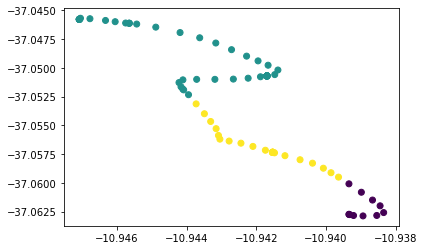

In [134]:
plt.figure()
plt.scatter(data.values[:,0],data.values[:,1],c=np.argmin(get_similarity_matrix(data.values, cheby.centroids, chebyshev),axis=1))
plt.show()

In [89]:
minkow = Kmeans(n_clusters=3, algo=minkowski)
minkow.fit(data.values)

print(minkow.centroids)
print()
print(get_similarity_matrix(data.values, minkow.centroids, minkowski))

[[-10.94194066 -37.05675924]
 [-10.93907607 -37.06172505]
 [-10.94371322 -37.04898691]]

[[0.00652311 0.00105109 0.01443325]
 [0.00652311 0.00105109 0.01443325]
 [0.0065506  0.0010686  0.01445988]
 [0.0066683  0.00112606 0.01456938]
 [0.00681591 0.00116166 0.0146892 ]
 [0.00696415 0.00123436 0.014785  ]
 [0.00684766 0.00112997 0.01462136]
 [0.00629756 0.00068514 0.01403759]
 [0.00576087 0.00046822 0.01349165]
 [0.00502116 0.00091028 0.01274159]
 [0.00422141 0.00165994 0.01192917]
 [0.00357983 0.00229275 0.01127696]
 [0.00314917 0.00271858 0.01084296]
 [0.00271148 0.00315892 0.01039848]
 [0.0021802  0.00367663 0.00987997]
 [0.00171656 0.00408949 0.00948146]
 [0.00116396 0.00459498 0.00901619]
 [0.00078224 0.00495572 0.00869614]
 [0.00071457 0.00502117 0.00863865]
 [0.00071457 0.00502117 0.00863865]
 [0.00071457 0.00502117 0.00863865]
 [0.00071457 0.00502117 0.00863865]
 [0.00071457 0.00502117 0.00863865]
 [0.00071457 0.00502117 0.00863865]
 [0.00071457 0.00502117 0.00863865]
 [0.0007145

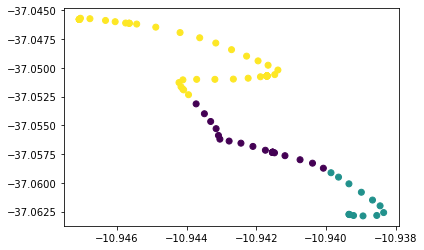

In [135]:
plt.figure()
plt.scatter(data.values[:,0],data.values[:,1],c=np.argmin(get_similarity_matrix(data.values, minkow.centroids, minkowski),axis=1))
plt.show()

In [90]:
strs = ['astounding', 'angel', 'dissolve', 'sabotage', 'village', 'homeless', 'speed', 'muscular', 'flap', 'apparent']

In [115]:
def string_similarity(strs, algo=hamming):
    mat = [[0 for i in range(len(strs))] for j in range(len(strs))]
    for i in range(len(strs)):
        for j in range(len(strs)):
            l = max(len(strs[i]),len(strs[j]))
            mat[i][j] = round(algo(list(strs[i]+' '*(l-len(strs[i])+1)), list(strs[j]+' '*(l-len(strs[j])+1))),2)
    return mat

In [124]:
def lcs(X , Y): 
    # find the length of the strings 
    m = len(X) 
    n = len(Y) 
  
    # declaring the array for storing the dp values 
    L = [[None]*(n+1) for i in range(m+1)] 
  
    """Following steps build L[m+1][n+1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of X[0..i-1] 
    and Y[0..j-1]"""
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j] , L[i][j-1]) 
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
    return L[m][n] 

In [125]:
string_similarity(strs, algo=hamming)

[[0.0, 0.82, 0.91, 0.82, 0.91, 0.91, 0.91, 0.82, 0.91, 0.82],
 [0.82, 0.0, 0.89, 0.89, 0.88, 0.67, 0.67, 0.89, 0.83, 0.78],
 [0.91, 0.89, 0.0, 0.78, 0.78, 0.89, 0.89, 0.67, 0.89, 0.89],
 [0.82, 0.89, 0.78, 0.0, 0.89, 0.89, 0.78, 0.89, 0.89, 0.89],
 [0.91, 0.88, 0.78, 0.89, 0.0, 0.89, 0.88, 0.89, 0.88, 0.89],
 [0.91, 0.67, 0.89, 0.89, 0.89, 0.0, 0.78, 0.89, 0.89, 0.78],
 [0.91, 0.67, 0.89, 0.78, 0.88, 0.78, 0.0, 0.89, 0.83, 0.78],
 [0.82, 0.89, 0.67, 0.89, 0.89, 0.89, 0.89, 0.0, 0.89, 0.89],
 [0.91, 0.83, 0.89, 0.89, 0.88, 0.89, 0.83, 0.89, 0.0, 0.89],
 [0.82, 0.78, 0.89, 0.89, 0.89, 0.78, 0.78, 0.89, 0.89, 0.0]]

In [126]:
string_similarity(strs, algo=jaccard)

[[0.0, 9.0, 10.0, 9.0, 10.0, 10.0, 10.0, 9.0, 10.0, 9.0],
 [9.0, 0.0, 8.0, 8.0, 7.0, 6.0, 4.0, 8.0, 5.0, 7.0],
 [10.0, 8.0, 0.0, 7.0, 7.0, 8.0, 8.0, 6.0, 8.0, 8.0],
 [9.0, 8.0, 7.0, 0.0, 8.0, 8.0, 7.0, 8.0, 8.0, 8.0],
 [10.0, 7.0, 7.0, 8.0, 0.0, 8.0, 7.0, 8.0, 7.0, 8.0],
 [10.0, 6.0, 8.0, 8.0, 8.0, 0.0, 7.0, 8.0, 8.0, 7.0],
 [10.0, 4.0, 8.0, 7.0, 7.0, 7.0, 0.0, 8.0, 5.0, 7.0],
 [9.0, 8.0, 6.0, 8.0, 8.0, 8.0, 8.0, 0.0, 8.0, 8.0],
 [10.0, 5.0, 8.0, 8.0, 7.0, 8.0, 5.0, 8.0, 0.0, 8.0],
 [9.0, 7.0, 8.0, 8.0, 8.0, 7.0, 7.0, 8.0, 8.0, 0.0]]

In [127]:
string_similarity(strs, algo=lcs)

[[11, 4, 3, 4, 3, 2, 3, 3, 2, 3],
 [4, 6, 2, 4, 4, 3, 2, 2, 2, 3],
 [3, 2, 9, 4, 4, 4, 3, 3, 2, 2],
 [4, 4, 4, 9, 4, 3, 3, 3, 2, 4],
 [3, 4, 4, 4, 8, 3, 2, 3, 3, 3],
 [2, 3, 4, 3, 3, 9, 3, 3, 2, 2],
 [3, 2, 3, 3, 2, 3, 6, 2, 2, 3],
 [3, 2, 3, 3, 3, 3, 2, 9, 3, 3],
 [2, 2, 2, 2, 3, 2, 2, 3, 5, 3],
 [3, 3, 2, 4, 3, 2, 3, 3, 3, 9]]